## Air qulality index using ANN

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Data/Real-Data/Real_Combine.csv')
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


<AxesSubplot:>

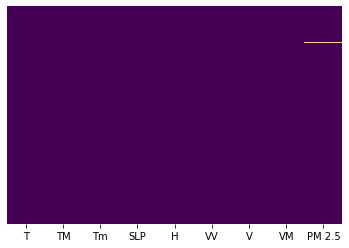

In [3]:
#checking for the null valuse using heatmap
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [4]:
#removethe null valuses 
df= df.dropna()

<AxesSubplot:>

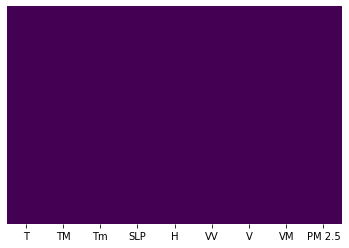

In [5]:
#checking for the null valuse using heatmap
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:>

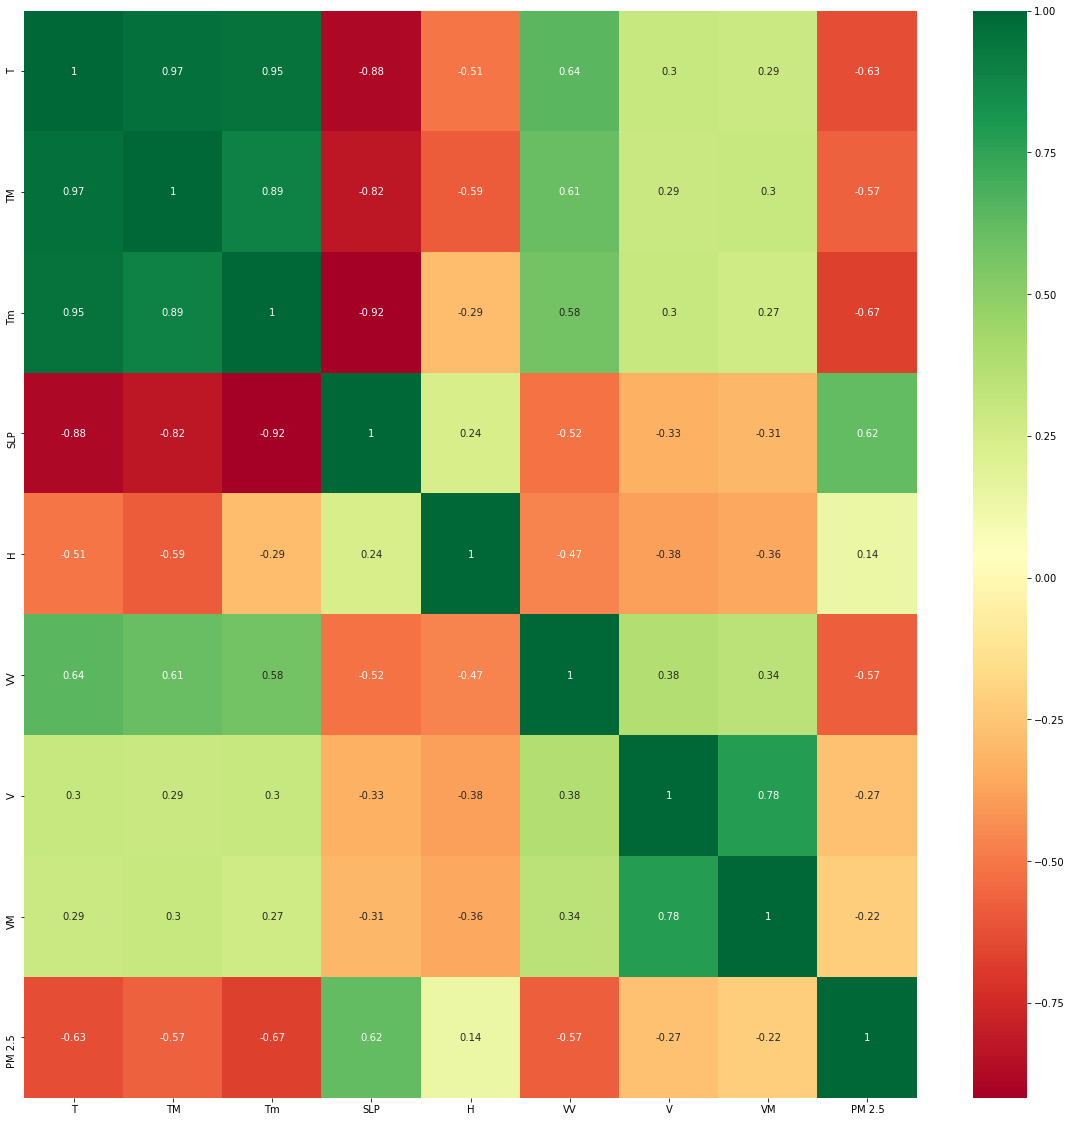

In [6]:
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [7]:
X = df.iloc[:,:-1]# for independent features
y= df.iloc[:,-1] # for dependent features

In [8]:
X.columns

Index(['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM'], dtype='object')

In [9]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [10]:
print(model.feature_importances_)

[0.1602082  0.08206173 0.20988422 0.16550619 0.08782306 0.20064705
 0.05294617 0.04092339]


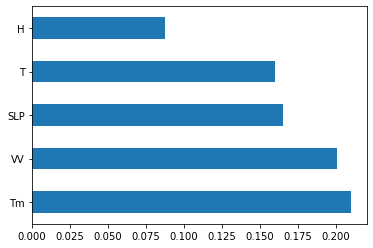

In [11]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

C:\Users\1mura\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

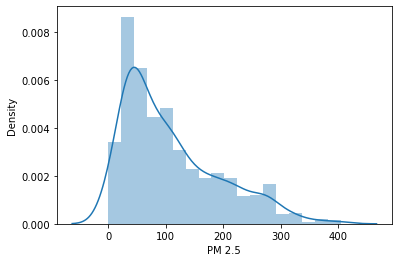

In [12]:
sns.distplot(y)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [18]:
from tensorflow.keras.models import Sequential

In [19]:
from tensorflow.keras.layers import Dense,LeakyReLU,PReLU,ELU,Dropout

In [22]:
NN_model = Sequential()

#input layer:
NN_model.add(Dense(128,kernel_initializer='normal',activation='relu',input_dim=X_train.shape[1]))

#Hidden Layers:
NN_model.add(Dense(256,kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256,kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256,kernel_initializer='normal',activation='relu'))

#Output Layer
NN_model.add(Dense(1, kernel_initializer='normal', activation='linear'))

#Compile the Network
NN_model.compile(loss='mean_absolute_error', optimizer='adam',metrics=['mean_absolute_error'])
NN_model.summary()

#Fitting ANN to Training model
model_history = NN_model.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs = 100)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 128)               1152      
_________________________________________________________________
dense_11 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_12 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_13 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 257       
Total params: 166,017
Trainable params: 166,017
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
52/52 [==============================] - 1s 17ms/step - loss: 70.0469 - mean_absolute_error: 70.0469 -

Epoch 44/100
52/52 [==============================] - 0s 5ms/step - loss: 41.7116 - mean_absolute_error: 41.7116 - val_loss: 44.2859 - val_mean_absolute_error: 44.2859
Epoch 45/100
52/52 [==============================] - 0s 5ms/step - loss: 41.6791 - mean_absolute_error: 41.6791 - val_loss: 43.7793 - val_mean_absolute_error: 43.7793
Epoch 46/100
52/52 [==============================] - 0s 5ms/step - loss: 40.5507 - mean_absolute_error: 40.5507 - val_loss: 44.6345 - val_mean_absolute_error: 44.6345
Epoch 47/100
52/52 [==============================] - 0s 4ms/step - loss: 40.0463 - mean_absolute_error: 40.0463 - val_loss: 44.0407 - val_mean_absolute_error: 44.0407
Epoch 48/100
52/52 [==============================] - 0s 5ms/step - loss: 40.1123 - mean_absolute_error: 40.1123 - val_loss: 45.7528 - val_mean_absolute_error: 45.7528
Epoch 49/100
52/52 [==============================] - 0s 5ms/step - loss: 42.7144 - mean_absolute_error: 42.7144 - val_loss: 45.4347 - val_mean_absolute_error: 

Epoch 93/100
52/52 [==============================] - 0s 4ms/step - loss: 38.5053 - mean_absolute_error: 38.5053 - val_loss: 43.7661 - val_mean_absolute_error: 43.7661
Epoch 94/100
52/52 [==============================] - 0s 4ms/step - loss: 39.0094 - mean_absolute_error: 39.0094 - val_loss: 43.2491 - val_mean_absolute_error: 43.2491
Epoch 95/100
52/52 [==============================] - 0s 4ms/step - loss: 38.6629 - mean_absolute_error: 38.6629 - val_loss: 43.2715 - val_mean_absolute_error: 43.2715
Epoch 96/100
52/52 [==============================] - 0s 4ms/step - loss: 39.5131 - mean_absolute_error: 39.5131 - val_loss: 43.2096 - val_mean_absolute_error: 43.2096
Epoch 97/100
52/52 [==============================] - 0s 4ms/step - loss: 38.8610 - mean_absolute_error: 38.8610 - val_loss: 43.3400 - val_mean_absolute_error: 43.3400
Epoch 98/100
52/52 [==============================] - 0s 4ms/step - loss: 40.9184 - mean_absolute_error: 40.9184 - val_loss: 43.4082 - val_mean_absolute_error: 

## Model Evaluation

In [23]:
prediction = NN_model.predict(X_test)

In [24]:
y_test

785    104.625000
742    125.891667
748    279.600000
986    110.416667
480     31.333333
          ...    
492     44.125000
62     142.500000
79      65.166667
300     22.333333
194      0.000000
Name: PM 2.5, Length: 328, dtype: float64

<AxesSubplot:ylabel='Density'>

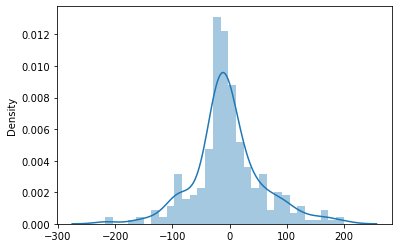

In [27]:
sns.distplot(y_test.values.reshape(-1,1)-prediction)

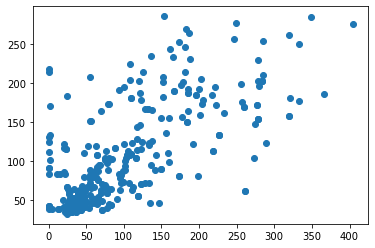

In [28]:
plt.scatter(y_test,prediction)

In [29]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 43.137871734495086
MSE: 3730.8677195944674
RMSE: 61.080829395109454


In [31]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 43.137871734495086
MSE: 3730.8677195944674
RMSE: 61.080829395109454


In [34]:
import pickle 